In [1]:
#This dataset is a selection of ~120,000 hotel bookings from the years 2015 to 2017.  

In [2]:
import sys
import numpy as np
import pandas as pd

#imported data
df = pd.read_csv('/Users/cameronrosenberger/Downloads/hotel_bookings.csv')

print(sys.version)
print(np.__version__)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
1.21.5


In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
#data types shown
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

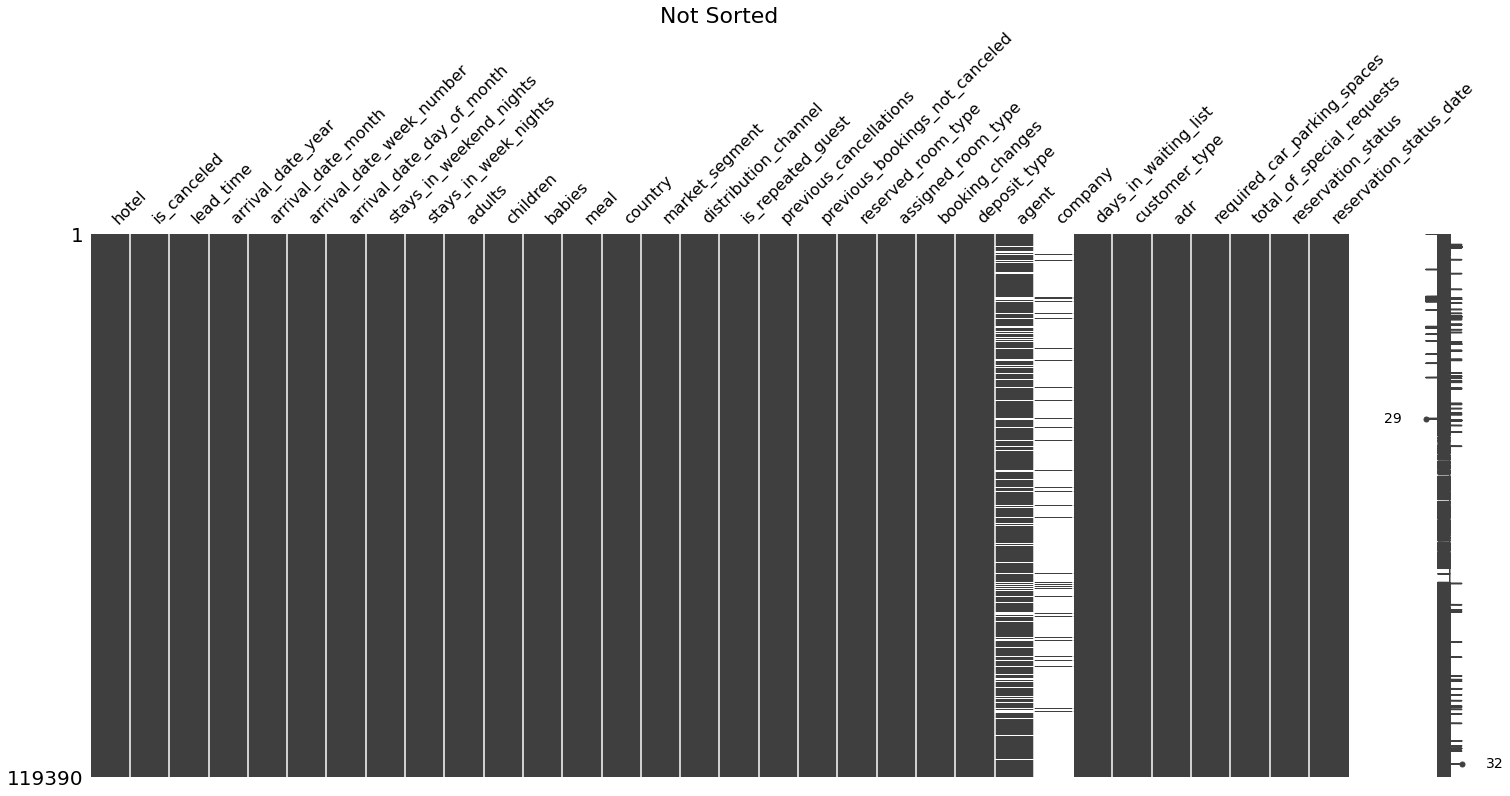

<Figure size 432x288 with 0 Axes>

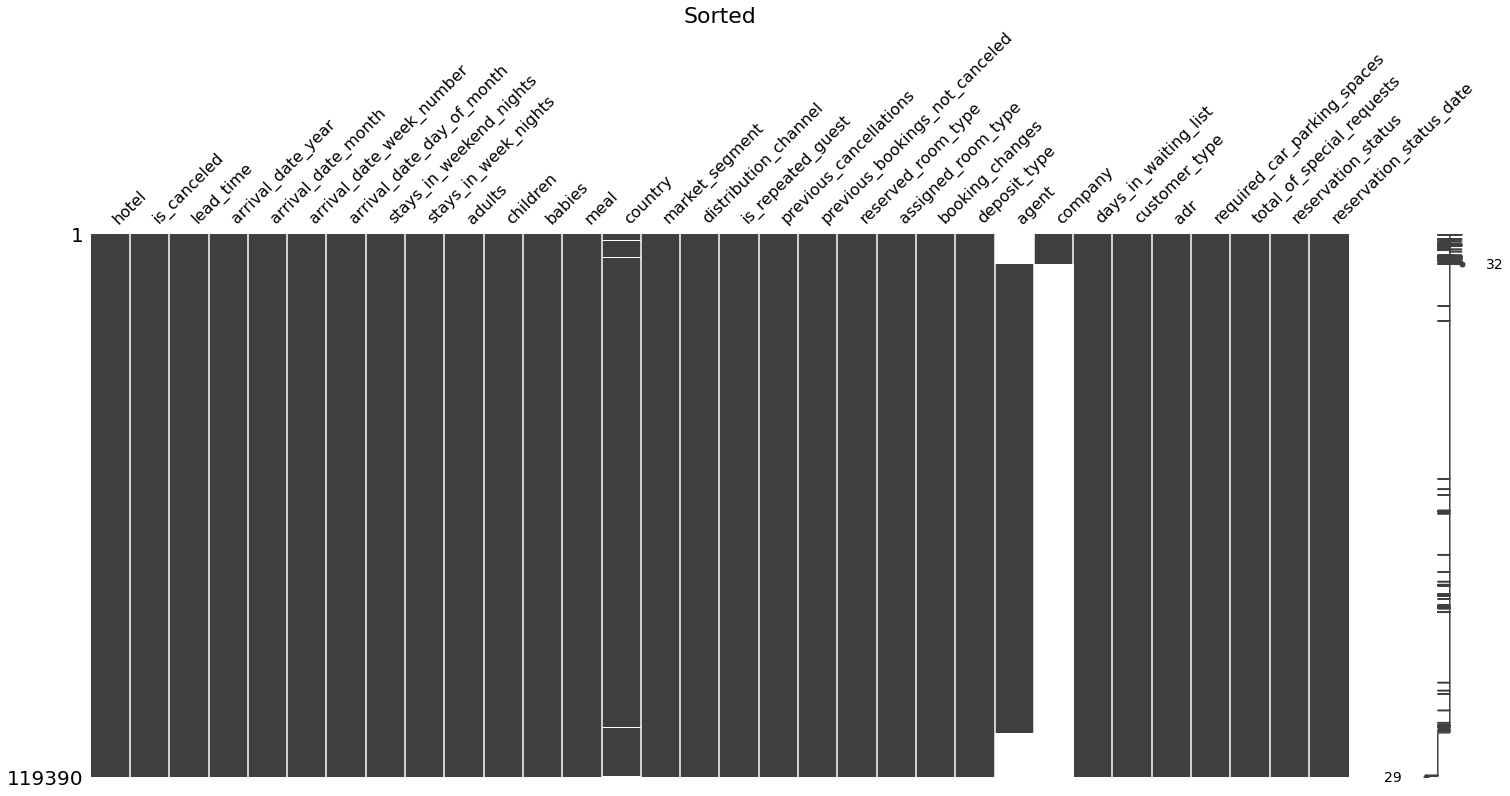

In [5]:
#display rows with missing data entries
df.isnull().sum()[df.isnull().sum()!=0]

#graphical representation of missing data
import missingno as mn
import matplotlib.pyplot as plt
mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["company","agent","country","children"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [198]:
#Company has too many missing entries to try to impute therefore we disregard that column
#df_new represents an updated data frame with imputed values for the missing children, country,and agent columns.
import copy
df_new = copy.deepcopy(df)
df_new.drop("company",axis=1,inplace = True)
df_new['children'].fillna(0,inplace = True)
df_new['country'].fillna(df['country'].mode()[0],inplace = True)
df_new['agent'].fillna(df['agent'].mode()[0],inplace=True)

In [199]:
#no more missing values
df_new[['is_canceled','country','children','lead_time']].isnull().sum()

is_canceled    0
country        0
children       0
lead_time      0
dtype: int64

In [200]:
data_def = pd.DataFrame()
data_def['Atributes'] = df_new.columns
data_def['Description'] = ['hotel type','0/1','days booked before stay','year','month','week number','day','number weekend stays','number of weekday stays','number of adults','number of children','number of babies','BB/ HB','country stayed in','commercial or personal','direct/ corporate/ TATO','0/1','number of previous bookings canceled','number of previous bookings not canceled','room type selected','room type given','number of changes made','deposit/ no deposit','agent','days waited','transient/ transient-party/ contract','adress','number of parking spaces','number of special requests','check-in/ check-out','date of stay']
data_def

,Atributes,Description
0,hotel,hotel type
1,is_canceled,0/1
2,lead_time,days booked before stay
3,arrival_date_year,year
4,arrival_date_month,month
5,arrival_date_week_number,week number
6,arrival_date_day_of_month,day
7,stays_in_weekend_nights,number weekend stays
8,stays_in_week_nights,number of weekday stays
9,adults,number of adults


In [9]:
#change data types from float to int for compatability
df_new['children'] = df_new['children'].astype(int)
df_new['agent'] = df_new["agent"].astype(int)
df_new['adr'] = df_new['adr'].astype(int)

print(f"There were  {df_new.adults.sum()} adults,\n\t    {df_new.children.sum()} children,and \n\t    {df_new.babies.sum()} babies listed. ")
df_new.info()

There were  221636 adults,
	    12403 children,and 
	    949 babies listed. 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  object
 1   is_canceled                     119390 non-null  int64 
 2   lead_time                       119390 non-null  int64 
 3   arrival_date_year               119390 non-null  int64 
 4   arrival_date_month              119390 non-null  object
 5   arrival_date_week_number        119390 non-null  int64 
 6   arrival_date_day_of_month       119390 non-null  int64 
 7   stays_in_weekend_nights         119390 non-null  int64 
 8   stays_in_week_nights            119390 non-null  int64 
 9   adults                          119390 non-null  int64 
 10  children                        119390 non-null  int64 
 11  babies        

In [268]:


df_grouped = df_new.groupby(by='country').size().sort_values(ascending=False)
# for val,grp in df_grouped:
#     print(f'There were {len(grp)} bookings in {val}.')
    
print("Top 20 Countries represented by frequency:")
df_grouped[:20]

Top 20 Countries represented by frequency:


country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
dtype: int64

In [287]:
print('\nLocations by %:')    
grp = df_new.groupby('country').size().sort_values(ascending=False)
print(grp.country.count() / grp.country.sum().nunique())
# print(grp.country.count() / grp.country.sum().nunique)


Locations by %:


AttributeError: 'Series' object has no attribute 'country'

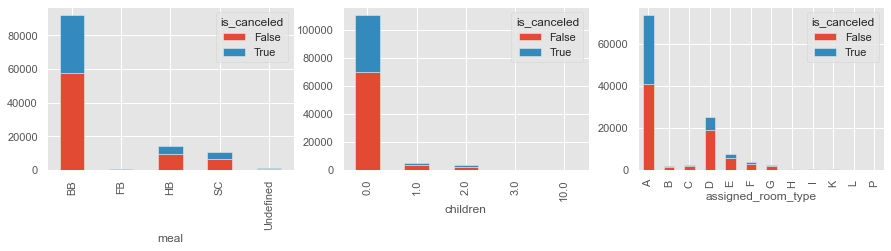

In [227]:
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)


pd.crosstab([df_new['children']], # categories to cross tabulate
            df_new.is_canceled.astype(bool)).plot(kind='bar', stacked=True, ax=ax2) 

pd.crosstab([df_new['assigned_room_type']], # categories to cross tabulate
            df_new.is_canceled.astype(bool)).plot(kind='bar', stacked=True, ax=ax3) 
pd.crosstab([df_new['meal']], # categories to cross tabulate
            df_new.is_canceled.astype(bool)).plot(kind='bar', stacked=True, ax=ax1) 

plt.show()

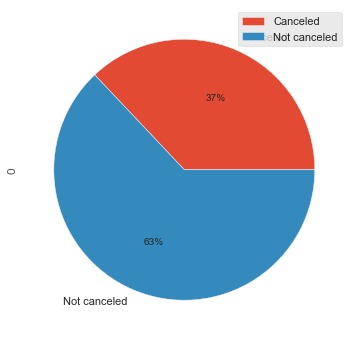

In [231]:

cancelPie = pd.DataFrame({df_new['is_canceled'].sum(),len(df_new)-df_new['is_canceled'].sum()},index=['Canceled','Not canceled'])
pie = cancelPie.plot.pie(subplots=True,figsize=(10,6),autopct='%1.0f%%')

Text(0.5, 1.0, 'Violin Example')

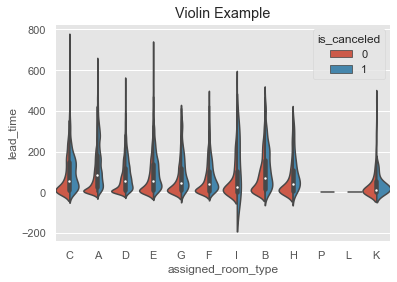

In [253]:
plt.subplot(1,1,1)
sns.violinplot(x="assigned_room_type", y="lead_time", hue="is_canceled", data=df_new,split=True,width=1,gridsize=500)
plt.title('Violin Example')



Text(0, 0.5, 'Cancelation %')

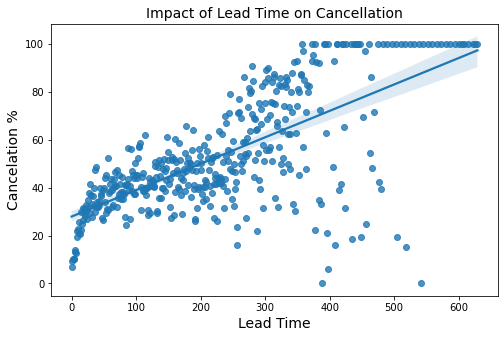

In [75]:

lead_canceled = pd.DataFrame(df_new.groupby("lead_time")["is_canceled"].describe())
lead_canceled_15 = lead_canceled[lead_canceled["count"]>15]

plt.figure(figsize=(8,5))
y = list(lead_canceled_15["mean"]*100)
x = list(lead_canceled_15.index)
sns.regplot(x=x,y=y)
plt.title("Impact of Lead Time on Cancellation",fontsize=14)
plt.xlabel("Lead Time",fontsize = 14)
plt.ylabel("Cancelation %",fontsize = 14)


Text(0, 0.5, 'Cancelation %')

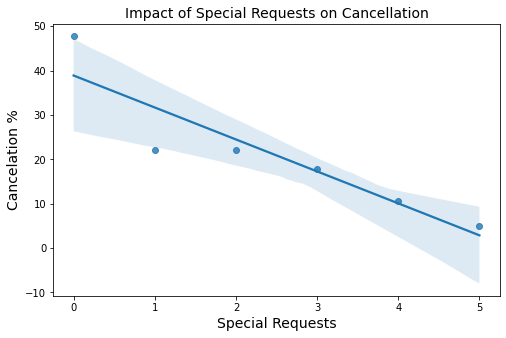

In [77]:
srq_canceled = pd.DataFrame(df_new.groupby("total_of_special_requests")["is_canceled"].describe())


plt.figure(figsize=(8,5))
y = list(srq_canceled['mean']*100)
x = list(srq_canceled.index)
sns.regplot(x=x,y=y)
plt.title("Impact of Special Requests on Cancellation",fontsize=14)
plt.xlabel("Special Requests",fontsize = 14)
plt.ylabel("Cancelation %",fontsize = 14)


<AxesSubplot:>

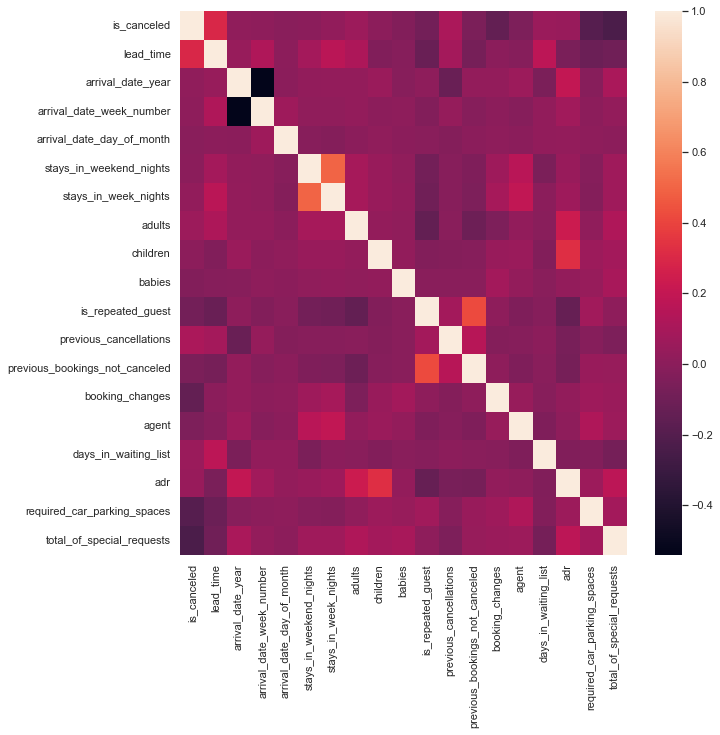

In [80]:
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_new.corr(), cmap=cmap, annot=False)



In [53]:
cancel_correlation = df_new.corr()['is_canceled']
cancel_correlation.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
agent                             0.049857
adr                               0.047921
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

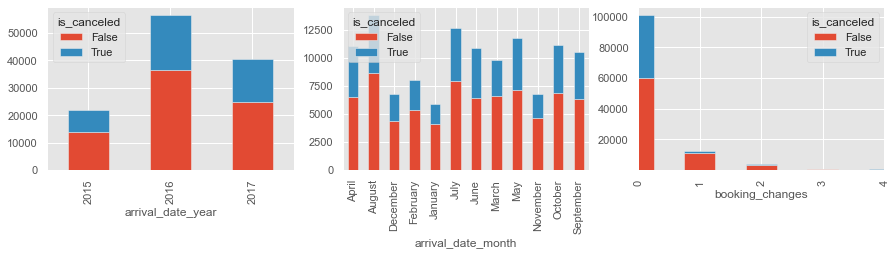

In [175]:

plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

pd.crosstab([df_new['arrival_date_year']], # categories to cross tabulate
            df_new.is_canceled.astype(bool)).plot(kind='bar', stacked=True, ax=ax1) 

pd.crosstab([df_new['arrival_date_month']], # categories to cross tabulate
            df_new.is_canceled.astype(bool)).plot(kind='bar', stacked=True, ax=ax2) 

pd.crosstab([df_new['booking_changes']], # categories to cross tabulate
            df_new.is_canceled.astype(bool)).plot(kind='bar', stacked=True, ax=ax3) 
plt.xlim([0,4])
plt.show()

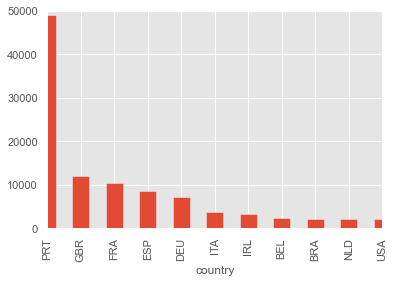

In [218]:
#this one needs some work. i want to show the top 50 countries represented but idk how
df_new.groupby('country').size().sort_values(ascending=False).plot(kind='bar')
plt.ylim([0,50000])
plt.xlim([0,10])
plt.show()

(0.0, 15.0)

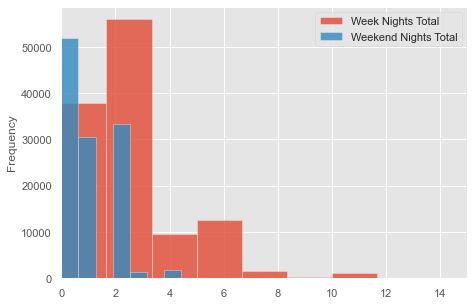

In [154]:
f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(1,2,1)
df_new.stays_in_week_nights.plot(kind='hist', alpha=0.80, 
                        label="Week Nights Total",
                        bins=bin_num)

df_new.stays_in_weekend_nights.plot(kind='hist', alpha=0.80, 
                        label="Weekend Nights Total",
                        bins=bin_num)
plt.legend()
plt.xlim([0, 15])

